In [52]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline  

In [37]:
df = pd.read_excel("D:\\A-DATA TECH & VOR DEM AUGUST\\project\\P_Data_Extract_From_World_Development_Indicators-.xlsx")


In [38]:
df.columns

Index(['Country Name', 'Country Code', 'Time', 'Time Code',
       'Electricity production from oil, gas and coal sources (% of total)',
       'Renewable electricity output (% of total electricity output)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Electricity production from nuclear sources (% of total)',
       'Access to electricity (% of population)',
       'Energy use (kg of oil equivalent per capita)',
       'GDP per capita (constant 2015 US$)', 'GDP growth (annual %)',
       'Net official development assistance received (current US$)',
       'Total reserves (includes gold, current US$)',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)',
       'Urban population (% of total population)', 'Population, total',
       'Forest area (% of land area)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'],
      dtype='object')

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 20 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Country Name                                                            816 non-null    object 
 1   Country Code                                                            816 non-null    object 
 2   Time                                                                    816 non-null    int64  
 3   Time Code                                                               816 non-null    object 
 4   Electricity production from oil, gas and coal sources (% of total)      816 non-null    object 
 5   Renewable electricity output (% of total electricity output)            816 non-null    object 
 6   Renewable energy consumption (% of total final energy consumption)      816 non-nu

In [40]:
df.isnull().sum()

Country Name                                                              0
Country Code                                                              0
Time                                                                      0
Time Code                                                                 0
Electricity production from oil, gas and coal sources (% of total)        0
Renewable electricity output (% of total electricity output)              0
Renewable energy consumption (% of total final energy consumption)        0
Electricity production from nuclear sources (% of total)                  0
Access to electricity (% of population)                                   0
Energy use (kg of oil equivalent per capita)                              0
GDP per capita (constant 2015 US$)                                        0
GDP growth (annual %)                                                     0
Net official development assistance received (current US$)                0
Total reserv

In [41]:
df.describe()


,Time,GDP per capita (constant 2015 US$),GDP growth (annual %),Population growth (annual %),Urban population (% of total population),"Population, total"
count,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02
mean,2011.500000,28137.650783,3.325673,1.058464,72.189343,1.342206e+08
std,6.926432,21272.172070,3.741602,1.237364,17.623915,3.025249e+08
min,2000.000000,718.342906,-10.940071,-4.170336,27.667000,3.493575e+06
25%,2005.750000,8429.821951,1.403664,0.433336,59.137500,9.741478e+06
50%,2011.500000,29794.990912,3.032506,0.856003,77.634500,3.825335e+07
75%,2017.250000,43523.889133,5.312993,1.382232,84.323000,8.254549e+07
max,2023.000000,99677.473102,24.615570,11.589980,100.000000,1.438070e+09


In [42]:
df.isnull().sum() / len(df) * 100


Country Name                                                              0.0
Country Code                                                              0.0
Time                                                                      0.0
Time Code                                                                 0.0
Electricity production from oil, gas and coal sources (% of total)        0.0
Renewable electricity output (% of total electricity output)              0.0
Renewable energy consumption (% of total final energy consumption)        0.0
Electricity production from nuclear sources (% of total)                  0.0
Access to electricity (% of population)                                   0.0
Energy use (kg of oil equivalent per capita)                              0.0
GDP per capita (constant 2015 US$)                                        0.0
GDP growth (annual %)                                                     0.0
Net official development assistance received (current US$)      

In [43]:
num_cols = [
    'Electricity production from oil, gas and coal sources (% of total)',
    'Renewable electricity output (% of total electricity output)',
    'Renewable energy consumption (% of total final energy consumption)',
    'Electricity production from nuclear sources (% of total)',
    'Access to electricity (% of population)',
    'Energy use (kg of oil equivalent per capita)',
    'Net official development assistance received (current US$)',
    'Total reserves (includes gold, current US$)',
    'Population density (people per sq. km of land area)',
    'Forest area (% of land area)',
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)']

In [44]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [45]:
# Eksik değerleri doldurma fonksiyonu
def fill_missing_values(series):
    """
    Eksik değerleri önceki 5-6 ve sonraki 5-6 değerin ortalaması ile doldurur.
    """
    series = series.copy()  # SettingWithCopyWarning'u önlemek için kopya al
    for i in range(len(series)):
        if pd.isna(series.iat[i]):
            prev_vals = series.iloc[max(0, i-6):i]
            next_vals = series.iloc[i+1:min(len(series), i+7)]
            valid_vals = pd.concat([prev_vals, next_vals]).dropna()
            
            if not valid_vals.empty:
                series.at[i] = valid_vals.mean()
    return series

In [46]:

# Time dışındaki sayısal sütunlarda eksik değerleri doldur
for col in num_cols + ['GDP per capita (constant 2015 US$)', 'GDP growth (annual %)', 'Population growth (annual %)', 'Urban population (% of total population)', 'Population, total']:
    df[col] = fill_missing_values(df[col])


In [47]:
df.isnull().sum() / len(df) * 100

Country Name                                                              0.0
Country Code                                                              0.0
Time                                                                      0.0
Time Code                                                                 0.0
Electricity production from oil, gas and coal sources (% of total)        0.0
Renewable electricity output (% of total electricity output)              0.0
Renewable energy consumption (% of total final energy consumption)        0.0
Electricity production from nuclear sources (% of total)                  0.0
Access to electricity (% of population)                                   0.0
Energy use (kg of oil equivalent per capita)                              0.0
GDP per capita (constant 2015 US$)                                        0.0
GDP growth (annual %)                                                     0.0
Net official development assistance received (current US$)      

In [48]:
# Boş Country Name değerlerini sil
df = df.dropna(subset=['Country Name'])

In [49]:
df.isnull().sum() / len(df) * 100

Country Name                                                              0.0
Country Code                                                              0.0
Time                                                                      0.0
Time Code                                                                 0.0
Electricity production from oil, gas and coal sources (% of total)        0.0
Renewable electricity output (% of total electricity output)              0.0
Renewable energy consumption (% of total final energy consumption)        0.0
Electricity production from nuclear sources (% of total)                  0.0
Access to electricity (% of population)                                   0.0
Energy use (kg of oil equivalent per capita)                              0.0
GDP per capita (constant 2015 US$)                                        0.0
GDP growth (annual %)                                                     0.0
Net official development assistance received (current US$)      

In [50]:
df.describe()

,Time,"Electricity production from oil, gas and coal sources (% of total)",Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Electricity production from nuclear sources (% of total),Access to electricity (% of population),Energy use (kg of oil equivalent per capita),GDP per capita (constant 2015 US$),GDP growth (annual %),Net official development assistance received (current US$),"Total reserves (includes gold, current US$)",Population density (people per sq. km of land area),Population growth (annual %),Urban population (% of total population),"Population, total",Forest area (% of land area),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,8.160000e+02,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000
mean,2011.500000,64.560081,22.193605,13.353693,11.868770,98.894792,3660.107659,28137.650783,3.325673,4.309799e+08,2.358004e+11,350.364268,1.058464,72.189343,1.342206e+08,28.497013,21.627749
std,6.926432,29.225554,22.618992,12.832571,18.102195,4.318377,2005.099249,21272.172070,3.741602,6.925884e+08,4.885334e+11,1181.991138,1.237364,17.623915,3.025249e+08,19.141521,13.524698
min,2000.000000,0.803115,0.000000,0.000000,0.000000,60.300000,414.895773,718.342906,-10.940071,-9.899400e+08,2.618495e+08,2.476967,-4.170336,27.667000,3.493575e+06,0.454484,5.636708
25%,2005.750000,47.882373,7.442361,3.375000,0.000000,99.800000,2041.971366,8429.821951,1.403664,3.363250e+07,3.434667e+10,25.048917,0.433336,59.137500,9.741478e+06,10.936857,12.717792
50%,2011.500000,73.092377,15.032433,9.400000,2.642685,100.000000,3531.943920,29794.990912,3.032506,1.742842e+08,9.038587e+10,105.823904,0.856003,77.634500,3.825335e+07,28.494994,17.247560
75%,2017.250000,86.259618,27.895409,19.900000,19.093901,100.000000,4872.579146,43523.889133,5.312993,5.897152e+08,2.290134e+11,236.076775,1.382232,84.323000,8.254549e+07,38.668133,25.271013
max,2023.000000,100.000000,93.479694,57.900000,79.511660,100.000000,10796.595758,99677.473102,24.615570,3.609090e+09,3.900039e+12,7965.878492,11.589980,100.000000,1.438070e+09,69.138854,79.037396


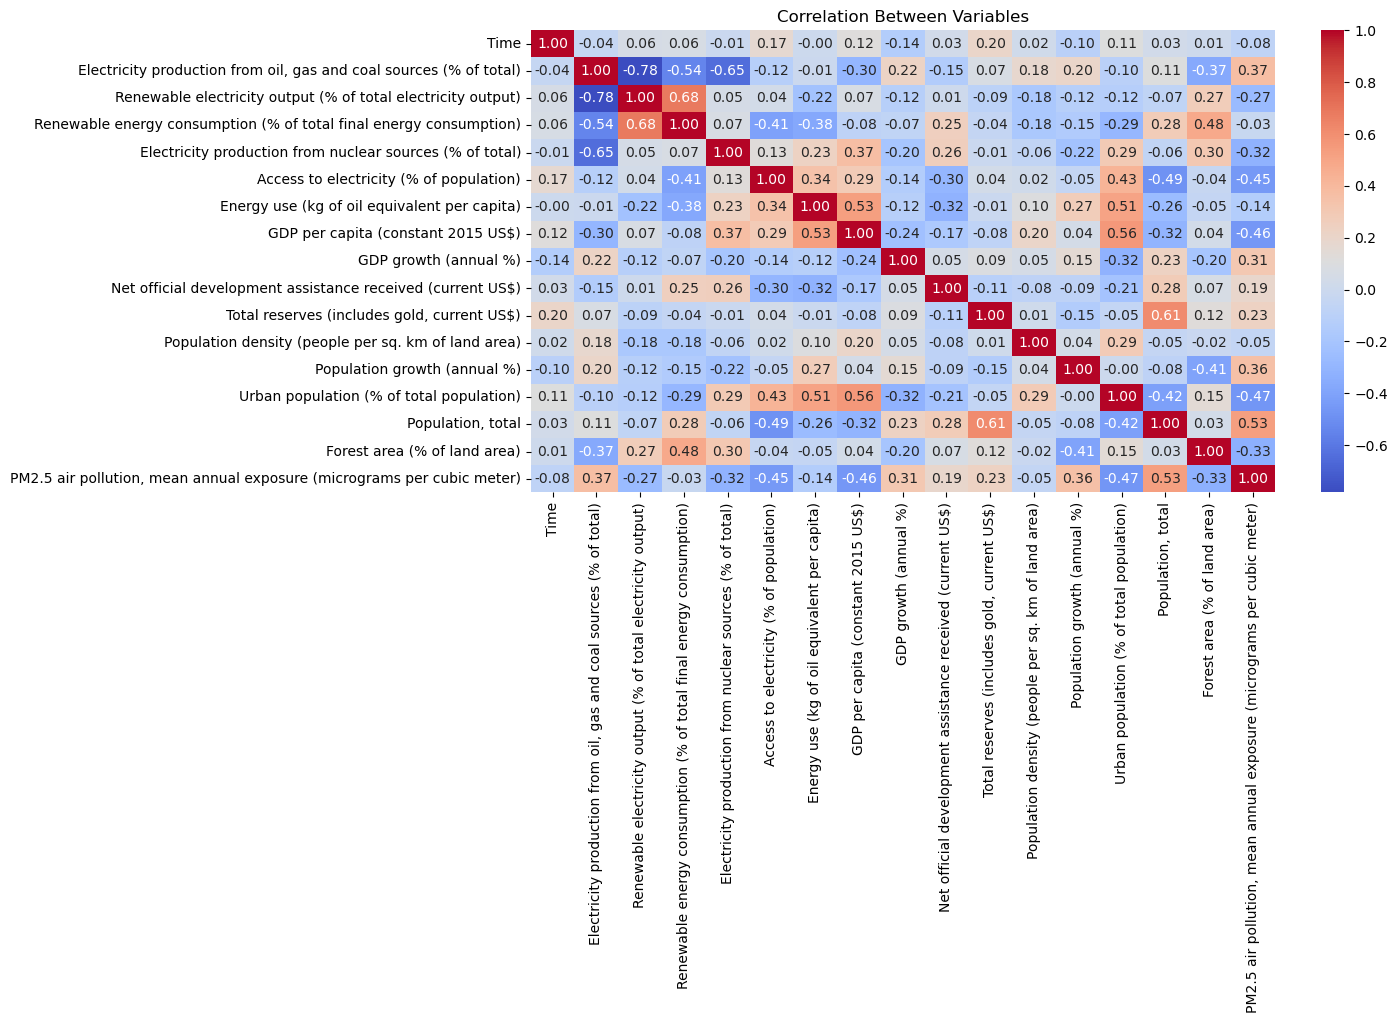

In [53]:

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Variables")
plt.show()


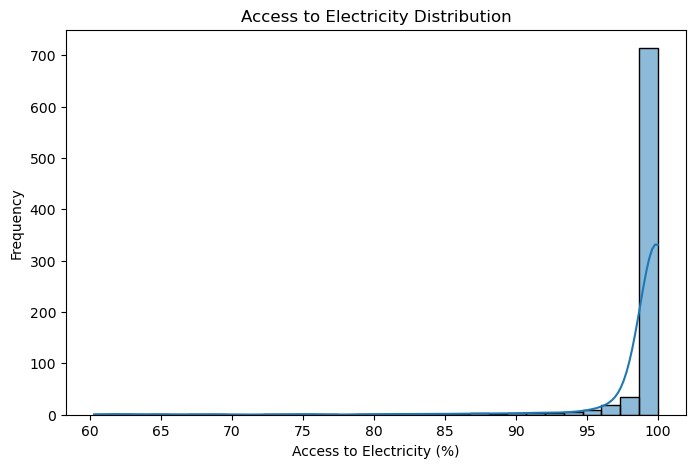

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(df["Access to electricity (% of population)"].dropna(), kde=True, bins=30)
plt.title("Access to Electricity Distribution")
plt.xlabel("Access to Electricity (%)")
plt.ylabel("Frequency")
plt.show()

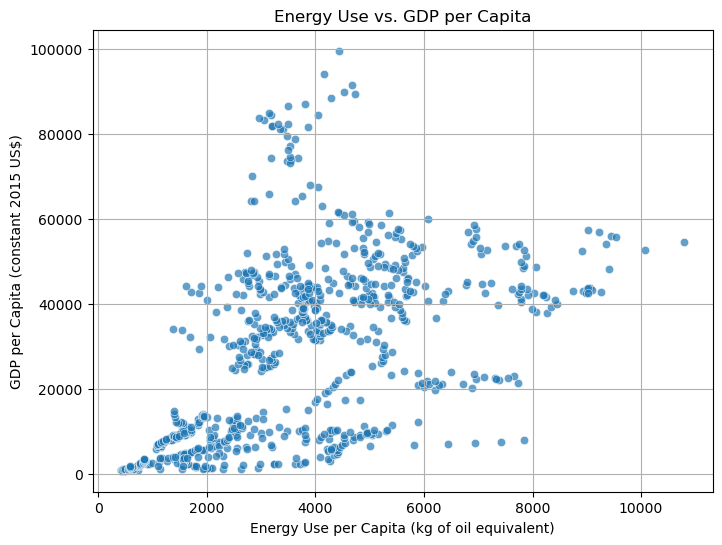

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Energy use (kg of oil equivalent per capita)", y="GDP per capita (constant 2015 US$)", alpha=0.7)
plt.title("Energy Use vs. GDP per Capita")
plt.xlabel("Energy Use per Capita (kg of oil equivalent)")
plt.ylabel("GDP per Capita (constant 2015 US$)")
plt.grid(True)
plt.show()

In [56]:
df[["Energy use (kg of oil equivalent per capita)", "GDP per capita (constant 2015 US$)"]].dtypes

Energy use (kg of oil equivalent per capita)    float64
GDP per capita (constant 2015 US$)              float64
dtype: object

In [57]:
df["Energy use (kg of oil equivalent per capita)"] = pd.to_numeric(df["Energy use (kg of oil equivalent per capita)"], errors="coerce")
df["GDP per capita (constant 2015 US$)"] = pd.to_numeric(df["GDP per capita (constant 2015 US$)"], errors="coerce")


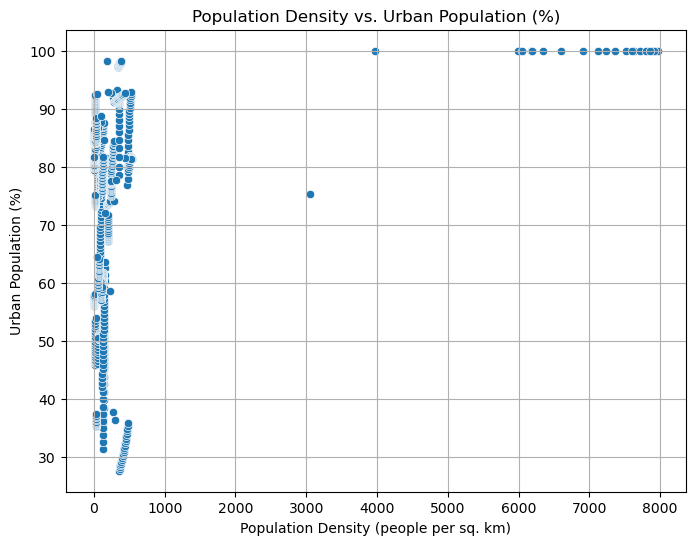

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Population density (people per sq. km of land area)", y="Urban population (% of total population)")
plt.title("Population Density vs. Urban Population (%)")
plt.xlabel("Population Density (people per sq. km)")
plt.ylabel("Urban Population (%)")
plt.grid(True)
plt.show()


In [60]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [61]:
import geopandas as gpd


url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)


world.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [63]:
df["Electricity production from oil, gas and coal sources (% of total)"] = pd.to_numeric(
    df["Electricity production from oil, gas and coal sources (% of total)"], errors="coerce"
)



In [64]:

merged = world.merge(df, how="left", left_on="ADMIN", right_on="Country Name")


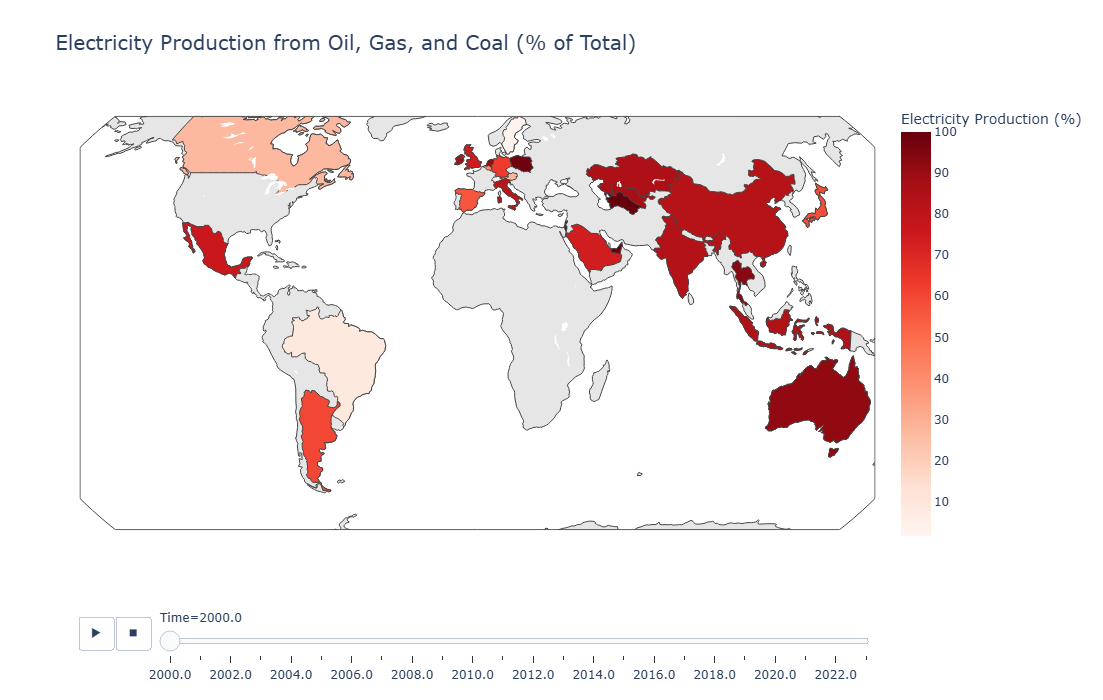

In [69]:
import plotly.express as px


fig = px.choropleth(
    merged,
    locations="ISO_A3",
    color="Electricity production from oil, gas and coal sources (% of total)",
    hover_name="Country Name",
    animation_frame="Time", 
    title="Electricity Production from Oil, Gas, and Coal (% of Total)",
    color_continuous_scale=px.colors.sequential.Reds,  
    projection="natural earth"
)


fig.update_layout(
    width=1200, 
    height=700, 
    coloraxis_colorbar=dict(title="Electricity Production (%)"),
    title_font=dict(size=20),
    geo=dict(
        showcoastlines=True, 
        showland=True, 
        landcolor="rgb(230, 230, 230)", 
        projection_scale=1.2  
    ),
)

fig.show()

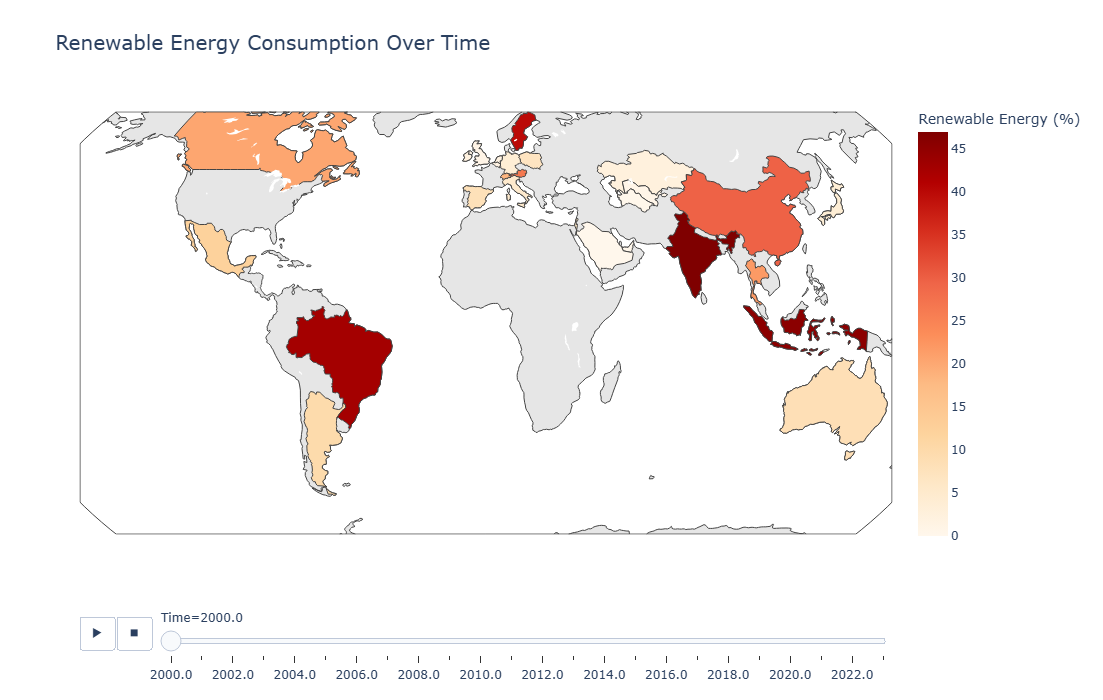

In [68]:
import plotly.express as px


fig = px.choropleth(
    merged,
    locations="ISO_A3",
    color="Renewable energy consumption (% of total final energy consumption)",
    hover_name="Country Name",
    animation_frame="Time",  
    title="Renewable Energy Consumption Over Time",
    color_continuous_scale=px.colors.sequential.OrRd,  
    projection="natural earth"
)

fig.update_layout(
    width=1200, 
    height=700, 
    coloraxis_colorbar=dict(title="Renewable Energy (%)"),
    title_font=dict(size=20),
    geo=dict(
        showcoastlines=True, 
        showland=True, 
        landcolor="rgb(230, 230, 230)",  
        projection_scale=1.2  
    ),
)

fig.show()

In [73]:
# Ülkelere kıta bilgisi ekleme
continent_dict = {
    "Africa": ["Algeria", "Angola", "Egypt", "Nigeria", "South Africa", "Kenya", "Ethiopia", "Morocco", "Ghana", "Sudan"],
    "Asia": ["China", "India", "Japan", "Indonesia", "Iran", "Pakistan", "Turkiye", "South Korea", "Saudi Arabia", "Thailand", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Kyrgyz Republic", "Korea, Rep.", "Israel", "Kazakhstan"],
    "Europe": ["Germany", "France", "United Kingdom", "Italy", "Spain", "Netherlands", "Sweden", "Switzerland", "Russia", "Poland", "Russian Federation", "Ireland", "Belgium", "Austria"],
    "North America": ["United States", "Canada", "Mexico", "Cuba", "Guatemala", "Honduras", "Panama", "Jamaica", "Costa Rica"],
    "South America": ["Brazil", "Argentina", "Colombia", "Chile", "Venezuela", "Peru", "Ecuador", "Bolivia", "Paraguay", "Uruguay"],
    "Oceania": ["Australia", "New Zealand", "Papua New Guinea", "Fiji", "Solomon Islands"]
}


In [74]:
def get_continent(country):
    for continent, countries in continent_dict.items():
        if country in countries:
            return continent
    return "Other"


In [75]:
df["Continent"] = df["Country Name"].apply(get_continent)

C:\Users\musta\AppData\Local\Temp\ipykernel_12140\3216853804.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.



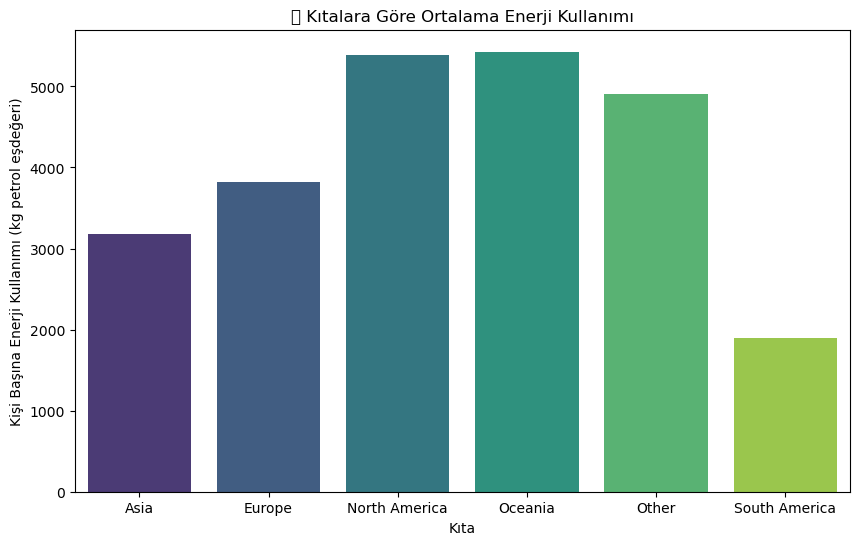

In [76]:
df_grouped_energy = df.groupby("Continent", as_index=False)["Energy use (kg of oil equivalent per capita)"].mean()


plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped_energy, x="Continent", y="Energy use (kg of oil equivalent per capita)", palette="viridis")

plt.title("🌍 Kıtalara Göre Ortalama Enerji Kullanımı", fontsize=12)
plt.xlabel("Kıta", fontsize=10)
plt.ylabel("Kişi Başına Enerji Kullanımı (kg petrol eşdeğeri)", fontsize=10)
plt.show()


In [78]:
df_clean = df.dropna(subset=["Electricity production from oil, gas and coal sources (% of total)"])


In [79]:
top_countries = df_clean.nlargest(10, "Electricity production from oil, gas and coal sources (% of total)")


In [81]:

df_mean = df.groupby("Country Name", as_index=False).agg({
    "Electricity production from oil, gas and coal sources (% of total)": "mean"
})


top_countries = df_mean.nlargest(10, "Electricity production from oil, gas and coal sources (% of total)")


print(top_countries)

            Country Name  \
29          Turkmenistan   
30  United Arab Emirates   
27              Thailand   
23             Singapore   
20                Poland   
12                Israel   
10             Indonesia   
19           Netherlands   
1              Australia   
18                Mexico   

    Electricity production from oil, gas and coal sources (% of total)  
29                                         100.000000                   
30                                          98.548184                   
27                                          93.354783                   
23                                          93.000423                   
20                                          91.549459                   
12                                          89.880354                   
10                                          88.334331                   
19                                          86.904186                   
1                                 

C:\Users\musta\AppData\Local\Temp\ipykernel_12140\3175691283.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




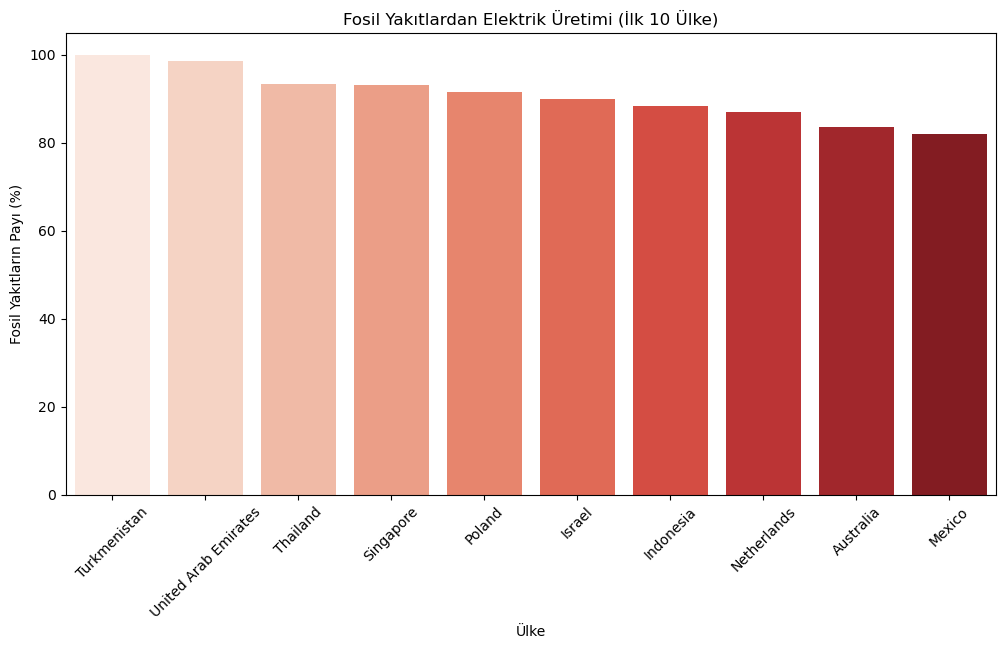

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x="Country Name", y="Electricity production from oil, gas and coal sources (% of total)", palette="Reds")
plt.xticks(rotation=45)
plt.title("Fosil Yakıtlardan Elektrik Üretimi (İlk 10 Ülke)")
plt.xlabel("Ülke")
plt.ylabel("Fosil Yakıtların Payı (%)")
plt.show()


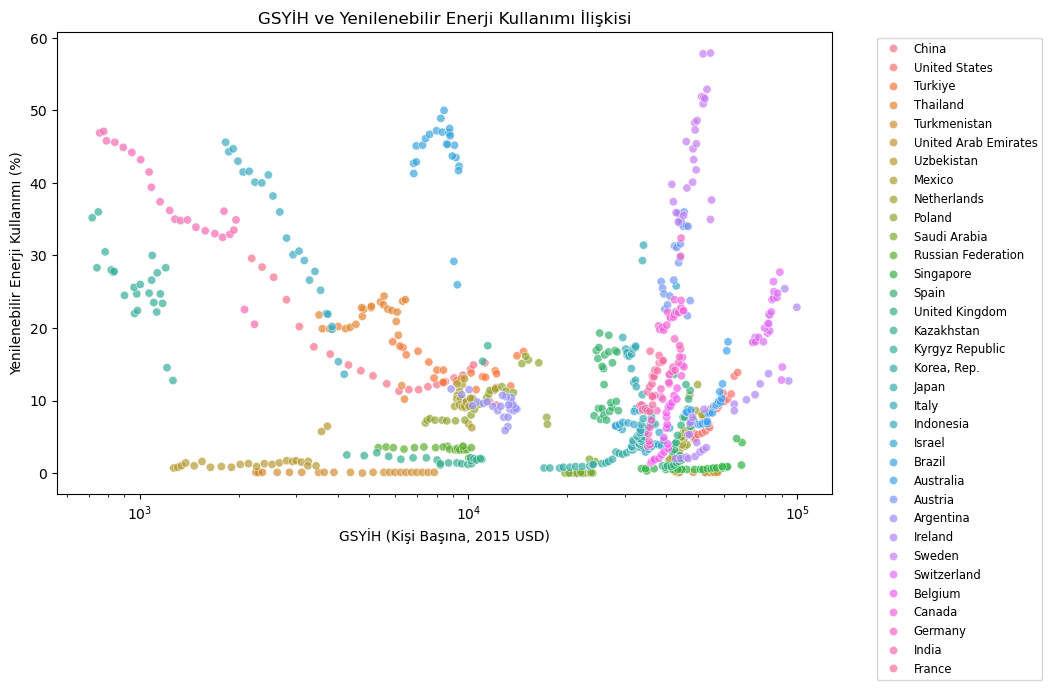

In [86]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, 
                x="GDP per capita (constant 2015 US$)", 
                y="Renewable energy consumption (% of total final energy consumption)", 
                hue="Country Name", 
                alpha=0.7)

plt.xscale("log")  # GSYİH çok değişken olduğu için log ölçek kullan
plt.title("GSYİH ve Yenilenebilir Enerji Kullanımı İlişkisi")
plt.xlabel("GSYİH (Kişi Başına, 2015 USD)")
plt.ylabel("Yenilenebilir Enerji Kullanımı (%)")

# **Legend'i küçült ve dışarı al**
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()


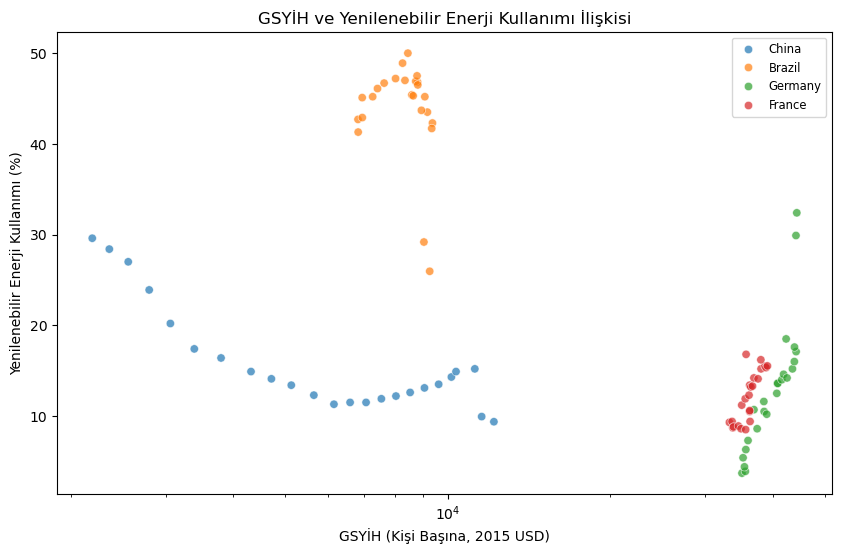

In [84]:
ülkeler = ["Germany", "France", "USA", "China", "Brazil"]  # Sadece belirli ülkeler
df_filtered = df[df["Country Name"].isin(ülkeler)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, 
                x="GDP per capita (constant 2015 US$)", 
                y="Renewable energy consumption (% of total final energy consumption)", 
                hue="Country Name", 
                alpha=0.7)

plt.xscale("log")
plt.title("GSYİH ve Yenilenebilir Enerji Kullanımı İlişkisi")
plt.xlabel("GSYİH (Kişi Başına, 2015 USD)")
plt.ylabel("Yenilenebilir Enerji Kullanımı (%)")

plt.legend(fontsize='small')
plt.show()


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128268 (\N{ELECTRIC PLUG}) missing from current font.



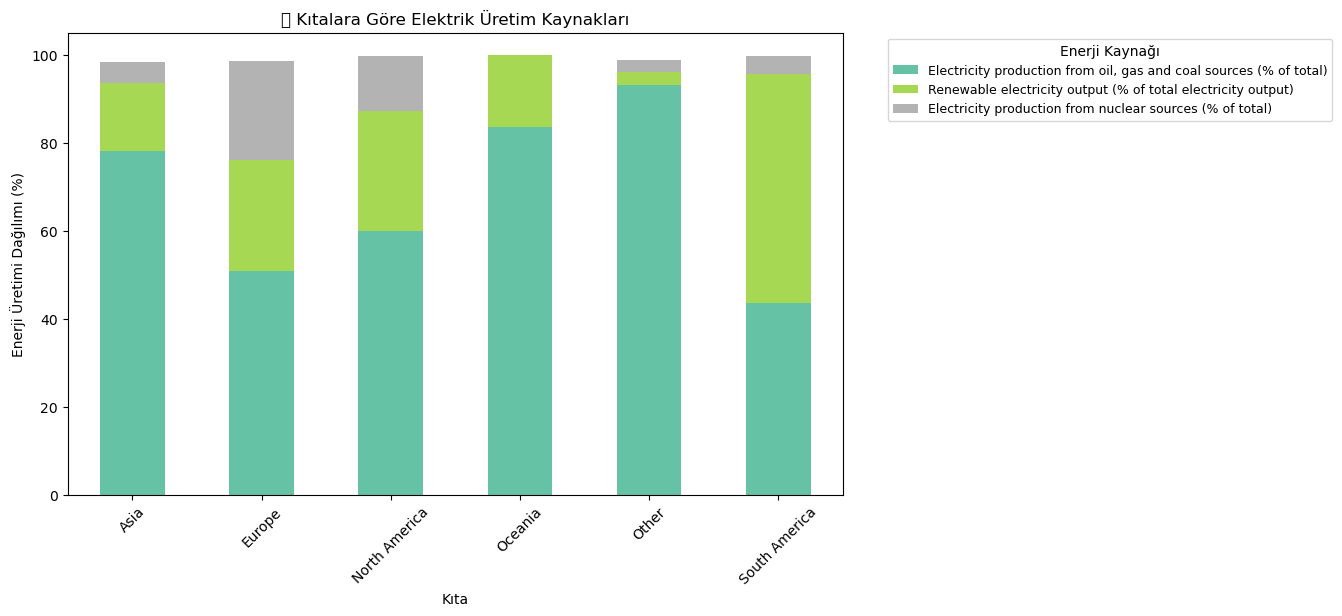

In [89]:
df_energy = df.groupby("Continent", as_index=False)[[
    "Electricity production from oil, gas and coal sources (% of total)",
    "Renewable electricity output (% of total electricity output)",
    "Electricity production from nuclear sources (% of total)"
]].mean()

df_energy.set_index("Continent").plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2")

plt.title("🔌 Kıtalara Göre Elektrik Üretim Kaynakları", fontsize=12)
plt.xlabel("Kıta", fontsize=10)
plt.ylabel("Enerji Üretimi Dağılımı (%)", fontsize=10)
plt.xticks(rotation=45, fontsize=10)

# **Legend'i grafiğin dışına al**
plt.legend(title="Enerji Kaynağı", fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from current font.



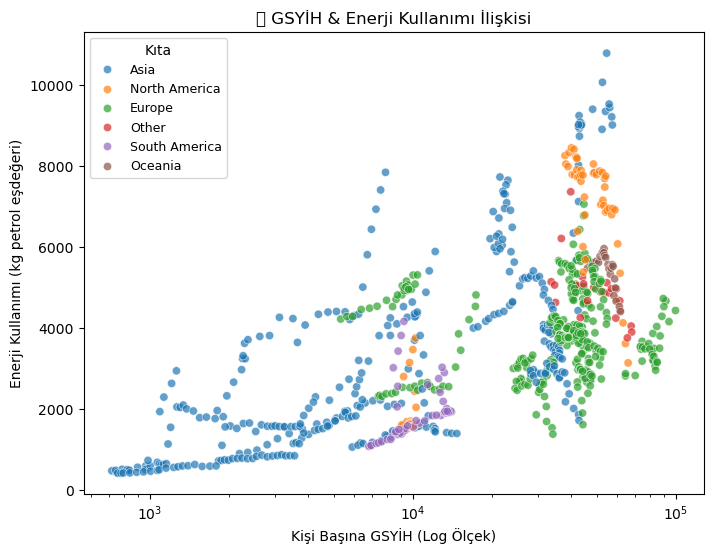

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="GDP per capita (constant 2015 US$)", y="Energy use (kg of oil equivalent per capita)", hue="Continent", alpha=0.7)

plt.xscale("log")  # Log ölçek, büyük farkları netleştirir
plt.title("💰 GSYİH & Enerji Kullanımı İlişkisi", fontsize=12)
plt.xlabel("Kişi Başına GSYİH (Log Ölçek)", fontsize=10)
plt.ylabel("Enerji Kullanımı (kg petrol eşdeğeri)", fontsize=10)
plt.legend(title="Kıta", fontsize=9)
plt.show()

C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127807 (\N{HERB}) missing from current font.



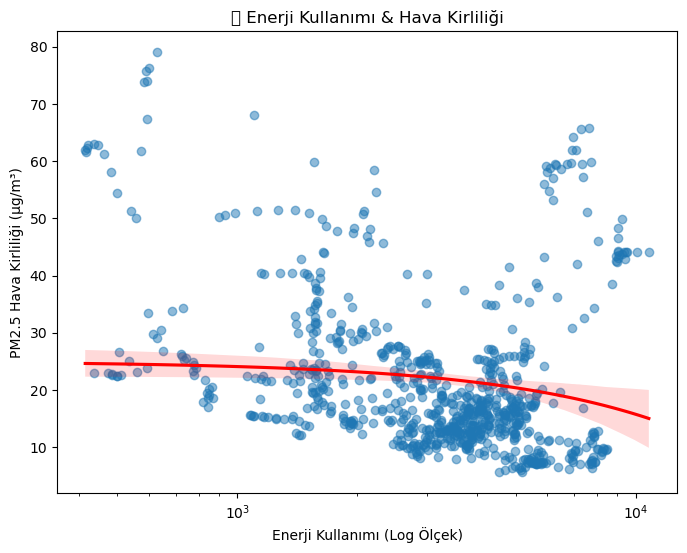

In [94]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="Energy use (kg of oil equivalent per capita)", y="PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.xscale("log")
plt.title("🌿 Enerji Kullanımı & Hava Kirliliği", fontsize=12)
plt.xlabel("Enerji Kullanımı (Log Ölçek)", fontsize=10)
plt.ylabel("PM2.5 Hava Kirliliği (µg/m³)", fontsize=10)
plt.show()


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127961 (\N{CITYSCAPE}) missing from current font.



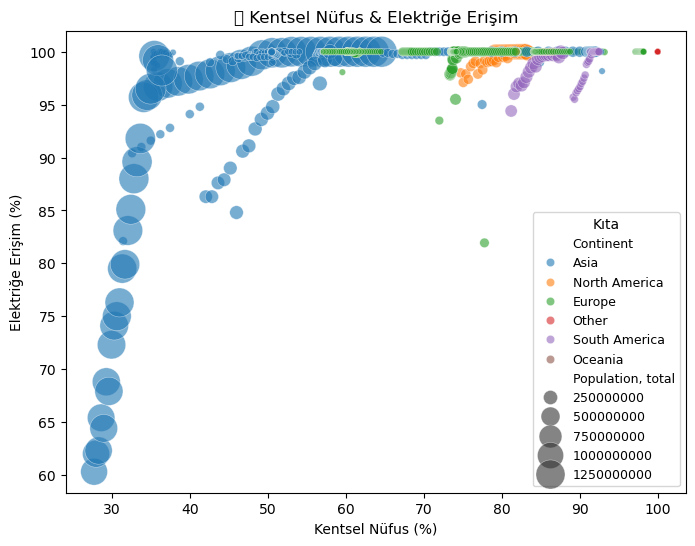

In [95]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Urban population (% of total population)", y="Access to electricity (% of population)", size="Population, total", hue="Continent", alpha=0.6, sizes=(20, 500))

plt.title("🏙️ Kentsel Nüfus & Elektriğe Erişim", fontsize=12)
plt.xlabel("Kentsel Nüfus (%)", fontsize=10)
plt.ylabel("Elektriğe Erişim (%)", fontsize=10)
plt.legend(title="Kıta", fontsize=9)
plt.show()

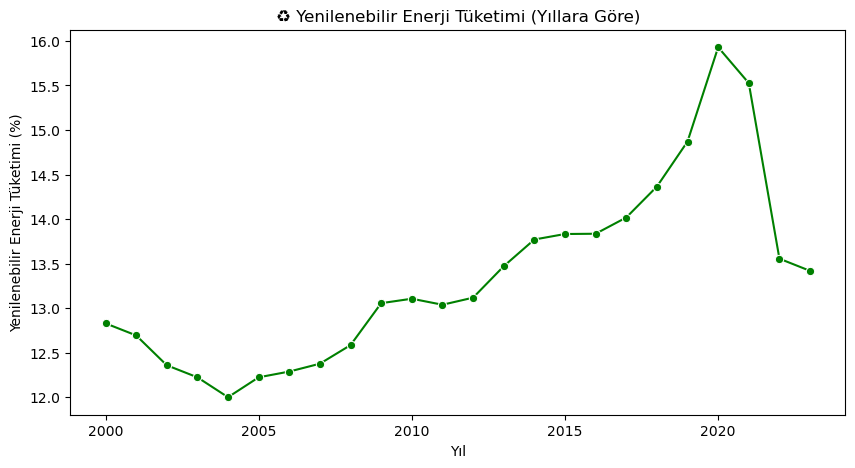

In [96]:
df_trend = df.groupby("Time", as_index=False)["Renewable energy consumption (% of total final energy consumption)"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_trend, x="Time", y="Renewable energy consumption (% of total final energy consumption)", marker="o", color="green")

plt.title("♻️ Yenilenebilir Enerji Tüketimi (Yıllara Göre)", fontsize=12)
plt.xlabel("Yıl", fontsize=10)
plt.ylabel("Yenilenebilir Enerji Tüketimi (%)", fontsize=10)
plt.show()


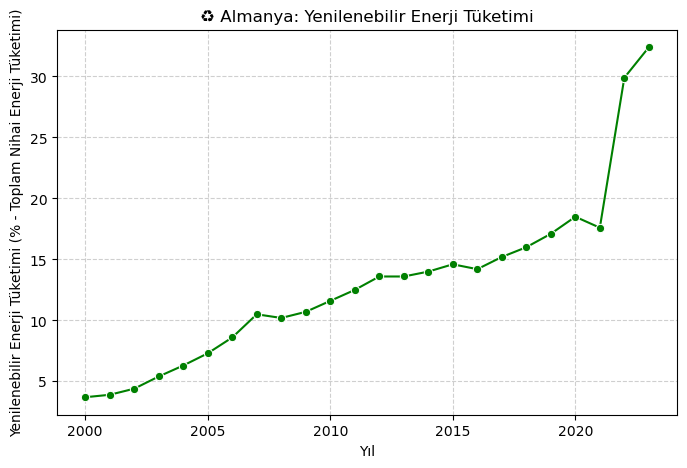

In [98]:

df_germany = df_clean[df_clean["Country Name"] == "Germany"]


plt.figure(figsize=(8, 5))
sns.lineplot(data=df_germany, x="Time", y="Renewable energy consumption (% of total final energy consumption)", marker="o", color="green")


plt.title("♻️ Almanya: Yenilenebilir Enerji Tüketimi", fontsize=12)
plt.xlabel("Yıl", fontsize=10)
plt.ylabel("Yenilenebilir Enerji Tüketimi (% - Toplam Nihai Enerji Tüketimi)", fontsize=10)


plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

In [105]:
pip install dash


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB 991.0 kB/s eta 0:00:08
   - -------------------------------------- 0.3/7.8 MB 2.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.8 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.8 MB 4.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.8 MB 4.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.8 MB 4.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 3.8 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.8 MB 5.2 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 5.1 MB/s eta 0:00:01
   --------------

In [106]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import dcc, html, Dash
from dash.dependencies import Input, Output

app = Dash(__name__)

app.layout = html.Div([
    dcc.Slider(
        min=df['Time'].min(),
        max=df['Time'].max(),
        step=1,
        marks={int(year): str(int(year)) for year in df['Time'].unique()},
        value=df['Time'].min(),
        id='year-slider'
    ),
    dcc.Graph(id='nuclear-energy-line-chart')  # Yeni grafik bileşeni eklendi
])

@app.callback(
    Output('nuclear-energy-line-chart', 'figure'),
    [Input('year-slider', 'value')]
)
def update_nuclear_chart(selected_year):
    filtered_df = df[df['Time'] == selected_year]
    
    fig = go.Figure()
    
    for country in filtered_df["Country Name"].unique():
        country_data = filtered_df[filtered_df["Country Name"] == country]
        fig.add_trace(go.Scatter(
            x=country_data["Time"], 
            y=country_data["Electricity production from nuclear sources (% of total)"], 
            mode='lines+markers',
            name=country
        ))
    
    fig.update_layout(
        title="Nuclear Energy Production Over Time",
        xaxis_title="Year",
        yaxis_title="Electricity Production from Nuclear Sources (% of Total)",
        height=600, width=1000
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [111]:
import pandas as pd
import plotly.express as px
from dash import dcc, html, Dash
from dash.dependencies import Input, Output

# Örnek veri seti (Eğer df'yi zaten yüklediysen, bunu kullanma)
df = pd.read_excel("D:\A-DATA TECH & VOR DEM AUGUST\project\P_Data_Extract_From_World_Development_Indicators-.xlsx")

# Sayısal veri dönüşümü
df["Electricity production from nuclear sources (% of total)"] = pd.to_numeric(
    df["Electricity production from nuclear sources (% of total)"], errors="coerce"
)

# Dash uygulamasını başlat
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Nuclear Energy Production Over Time", style={'textAlign': 'center'}),
    
    dcc.Slider(
        min=int(df['Time'].min()),
        max=int(df['Time'].max()),
        step=1,
        marks={int(year): str(int(year)) for year in df['Time'].unique()},
        value=int(df['Time'].min()),
        id='year-slider'
    ),
    
    dcc.Graph(id='nuclear-energy-chart')
])

@app.callback(
    Output('nuclear-energy-chart', 'figure'),
    [Input('year-slider', 'value')]
)
def update_chart(selected_year):
    filtered_df = df[df["Time"] == selected_year]  # Seçilen yıla göre filtrele

    fig = px.bar(
        filtered_df,
        x="Country Name",
        y="Electricity production from nuclear sources (% of total)",
        color="Country Name",  # Ülkeleri farklı renklerde göster
        title=f"Nuclear Energy Production in {selected_year}",
        labels={"Electricity production from nuclear sources (% of total)": "Nuclear Energy (%)"},
        height=600,
    )

    fig.update_layout(xaxis={'categoryorder':'total descending'})  # Büyükten küçüğe sıralama
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<>:7: SyntaxWarning:

invalid escape sequence '\A'

<>:7: SyntaxWarning:

invalid escape sequence '\A'

C:\Users\musta\AppData\Local\Temp\ipykernel_12140\3964421447.py:7: SyntaxWarning:

invalid escape sequence '\A'



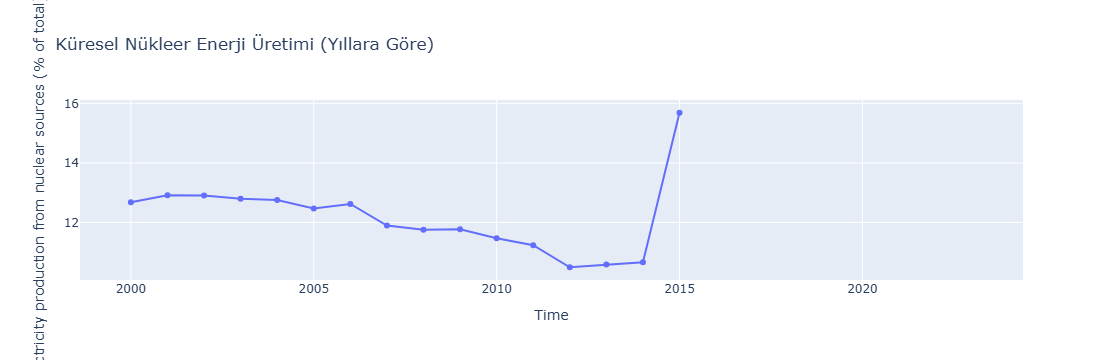

In [116]:
# **Nükleer Enerji Üretimi Zaman İçinde Değişimi**
fig_nuclear = px.line(
    df.groupby("Time")["Electricity production from nuclear sources (% of total)"].mean().reset_index(),
    x="Time", 
    y="Electricity production from nuclear sources (% of total)",
    title="Küresel Nükleer Enerji Üretimi (Yıllara Göre)",
    markers=True
)
fig_nuclear.show()

In [118]:
df["Continent"] = df["Country Name"].apply(get_continent).astype(str)


In [119]:
color="Country Name"


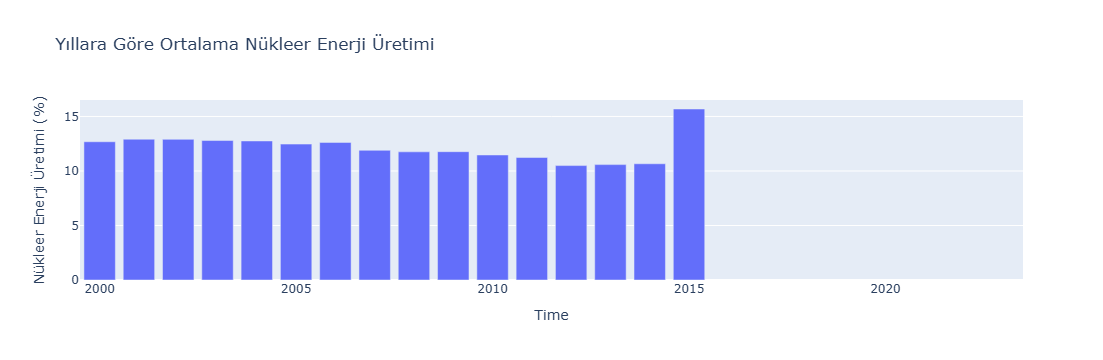

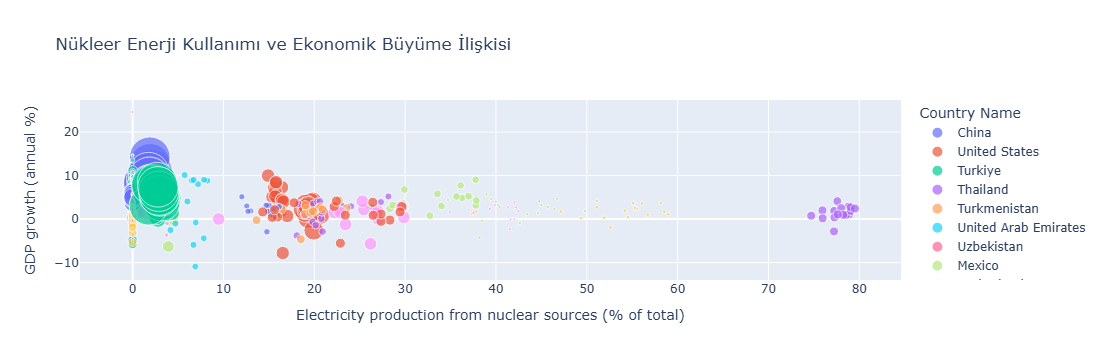

In [122]:
# **Yıllara Göre Nükleer Enerji Üretimi (Bar Chart)**
fig_nuclear_trend = px.bar(
    df.groupby("Time")["Electricity production from nuclear sources (% of total)"].mean().reset_index(),
    x="Time",
    y="Electricity production from nuclear sources (% of total)",
    title="Yıllara Göre Ortalama Nükleer Enerji Üretimi",
    labels={"Electricity production from nuclear sources (% of total)": "Nükleer Enerji Üretimi (%)"},
    color_discrete_sequence=["#636EFA"]
)
fig_nuclear_trend.show()

# **Nükleer Enerji Kullanımı ve Ekonomik Büyüme İlişkisi (Scatter Plot)**
fig_nuclear_gdp = px.scatter(
    df,
    x="Electricity production from nuclear sources (% of total)",
    y="GDP growth (annual %)",
    color="Country Name",
    hover_name="Country Name",
    title="Nükleer Enerji Kullanımı ve Ekonomik Büyüme İlişkisi",
    size="Population, total",
    size_max=30
)
fig_nuclear_gdp.show()


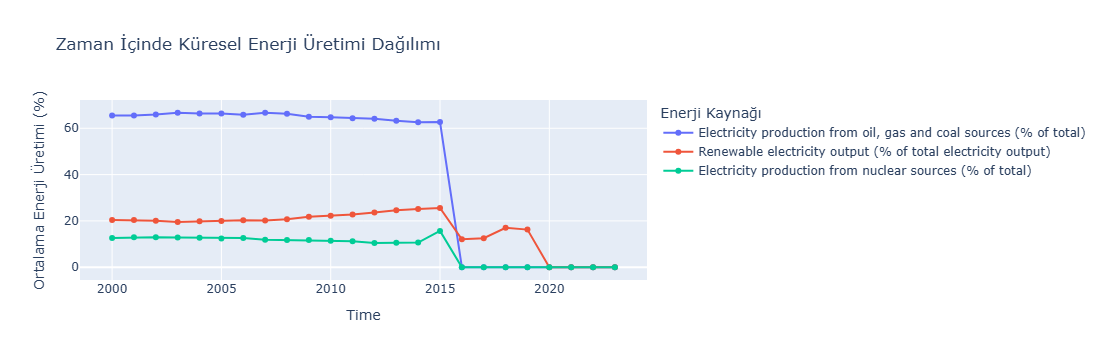

In [124]:
# Sayısal sütunları belirleyip dönüştürme
energy_columns = [
    "Electricity production from oil, gas and coal sources (% of total)",
    "Renewable electricity output (% of total electricity output)",
    "Electricity production from nuclear sources (% of total)"
]

df[energy_columns] = df[energy_columns].apply(pd.to_numeric, errors="coerce")  # Sayısal olmayanları NaN yap

# Zaman içindeki enerji üretim trendlerini hesapla
df_trend = df.groupby("Time")[energy_columns].mean().reset_index()

# Eksik değerleri doldur (Gerekirse)
df_trend = df_trend.fillna(0)

# **Zaman İçinde Enerji Üretim Kaynaklarının Değişimi (Line Chart)**
fig_energy_trend = px.line(
    df_trend,
    x="Time",
    y=energy_columns,
    title="Zaman İçinde Küresel Enerji Üretimi Dağılımı",
    labels={"value": "Ortalama Enerji Üretimi (%)", "variable": "Enerji Kaynağı"},
    markers=True
)

fig_energy_trend.show()


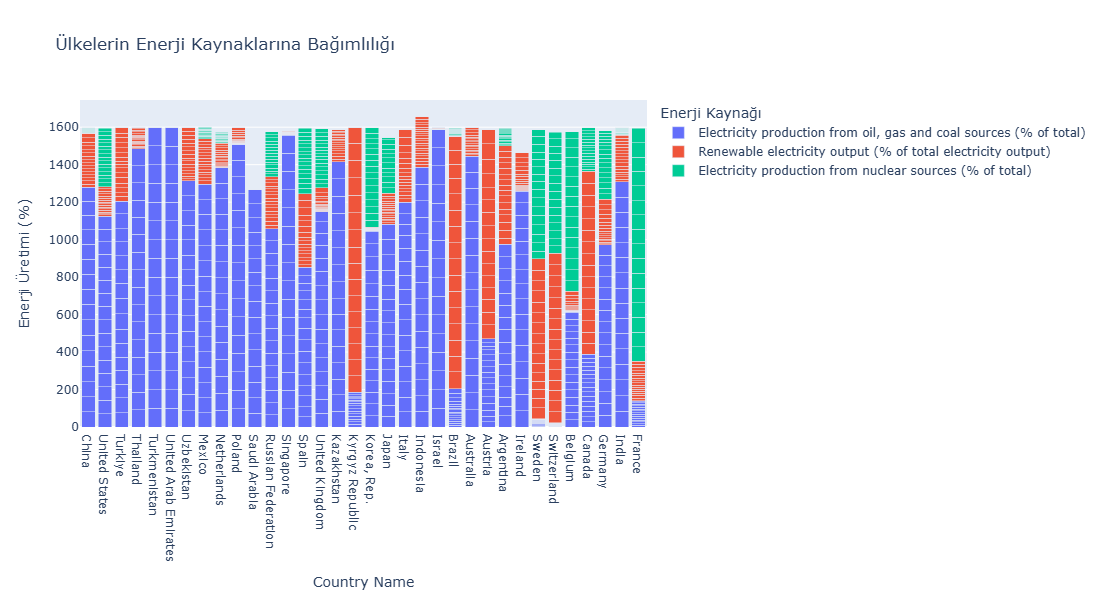

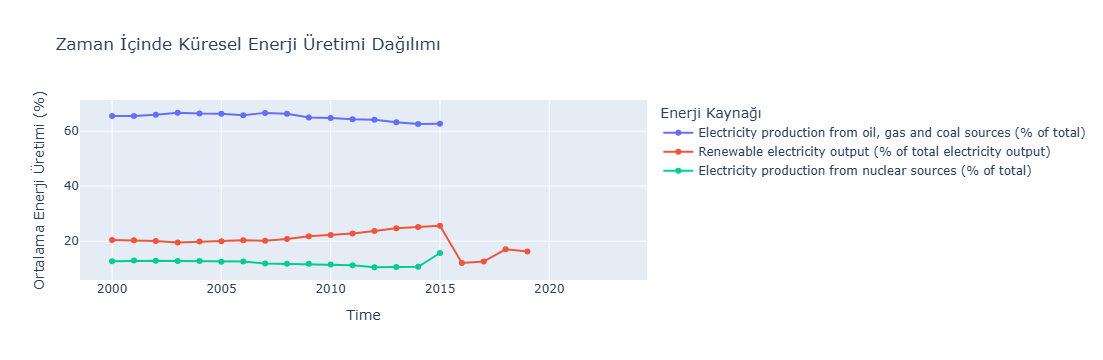

In [125]:
# **Ülkelerin Enerji Kaynaklarına Bağımlılığı (Stacked Bar Chart)**
fig_energy_distribution = px.bar(
    df,
    x="Country Name",
    y=[
        "Electricity production from oil, gas and coal sources (% of total)",
        "Renewable electricity output (% of total electricity output)",
        "Electricity production from nuclear sources (% of total)"
    ],
    title="Ülkelerin Enerji Kaynaklarına Bağımlılığı",
    labels={"value": "Enerji Üretimi (%)", "variable": "Enerji Kaynağı"},
    barmode="stack",
    height=600
)
fig_energy_distribution.show()

# **Zaman İçinde Enerji Üretim Kaynaklarının Değişimi (Line Chart)**
df_trend = df.groupby("Time")[
    ["Electricity production from oil, gas and coal sources (% of total)",
     "Renewable electricity output (% of total electricity output)",
     "Electricity production from nuclear sources (% of total)"]
].mean().reset_index()

fig_energy_trend = px.line(
    df_trend,
    x="Time",
    y=df_trend.columns[1:],
    title="Zaman İçinde Küresel Enerji Üretimi Dağılımı",
    labels={"value": "Ortalama Enerji Üretimi (%)", "variable": "Enerji Kaynağı"},
    markers=True
)
fig_energy_trend.show()


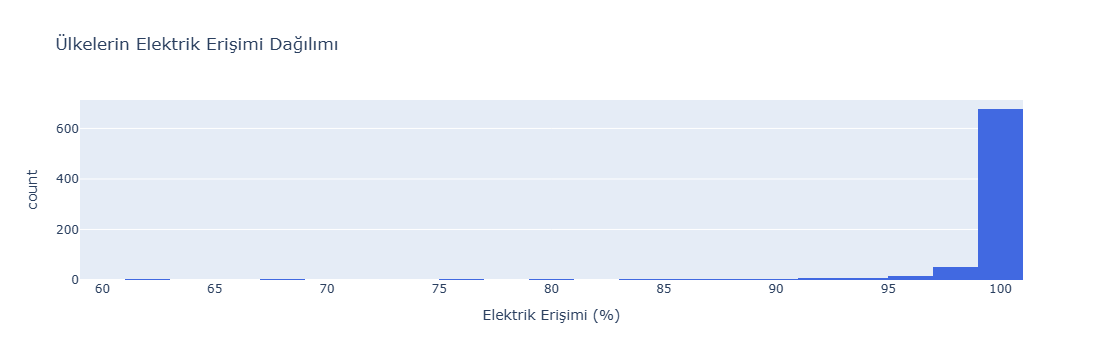

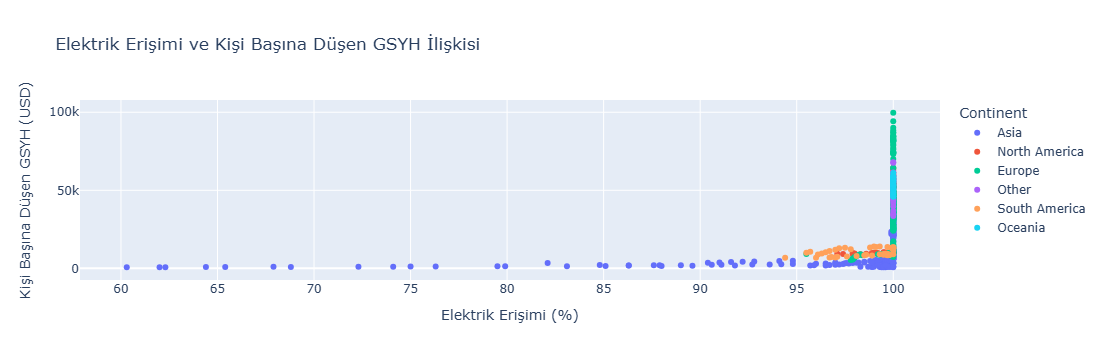

In [126]:
# **Elektrik Erişimi ve Gelişmişlik İlişkisi - Histogram**
fig_electricity_hist = px.histogram(
    df,
    x="Access to electricity (% of population)",
    nbins=20,
    title="Ülkelerin Elektrik Erişimi Dağılımı",
    labels={"Access to electricity (% of population)": "Elektrik Erişimi (%)"},
    color_discrete_sequence=["royalblue"]
)

fig_electricity_hist.show()

# **Elektrik Erişimi ile Kişi Başına Düşen GSYH Arasındaki Korelasyon - Scatter Plot**
fig_electricity_gdp = px.scatter(
    df,
    x="Access to electricity (% of population)",
    y="GDP per capita (constant 2015 US$)",
    title="Elektrik Erişimi ve Kişi Başına Düşen GSYH İlişkisi",
    labels={
        "Access to electricity (% of population)": "Elektrik Erişimi (%)",
        "GDP per capita (constant 2015 US$)": "Kişi Başına Düşen GSYH (USD)"
    },
    hover_name="Country Name",
    color="Continent"
)

fig_electricity_gdp.show()


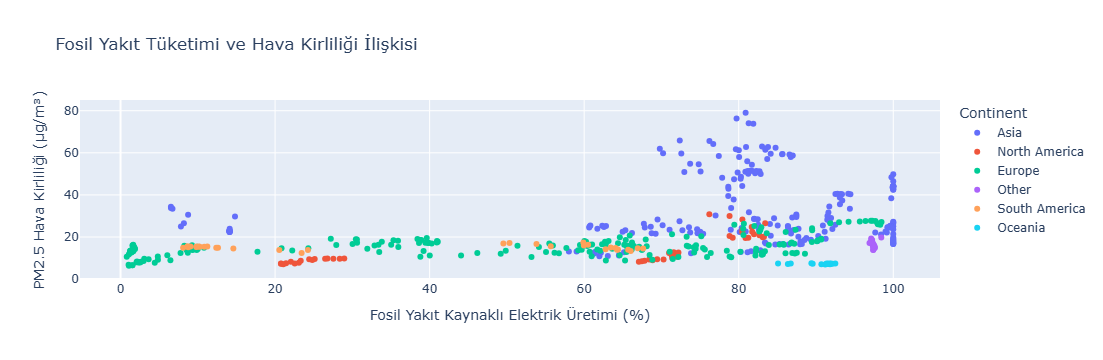

ValueError: could not convert string to float: '..'

In [128]:
# **Fosil Yakıt Tüketimi ve Hava Kirliliği İlişkisi - Scatter Plot**
fig_pollution_scatter = px.scatter(
    df,
    x="Electricity production from oil, gas and coal sources (% of total)",
    y="PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",
    title="Fosil Yakıt Tüketimi ve Hava Kirliliği İlişkisi",
    labels={
        "Electricity production from oil, gas and coal sources (% of total)": "Fosil Yakıt Kaynaklı Elektrik Üretimi (%)",
        "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)": "PM2.5 Hava Kirliliği (µg/m³)"
    },
    hover_name="Country Name",
    color="Continent"
)

fig_pollution_scatter.show()

# **Hava Kirliliği ve Enerji Kullanımı - Heatmap**
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[["Electricity production from oil, gas and coal sources (% of total)", "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Hava Kirliliği ve Enerji Kullanımı Korelasyon Haritası")
plt.show()


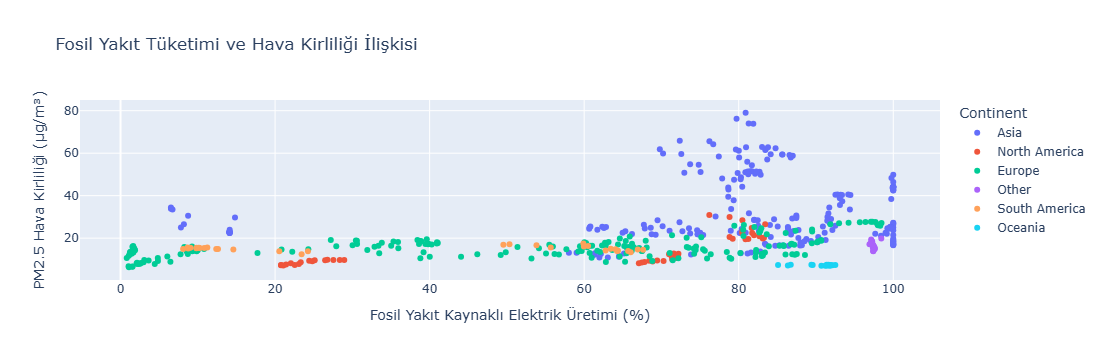

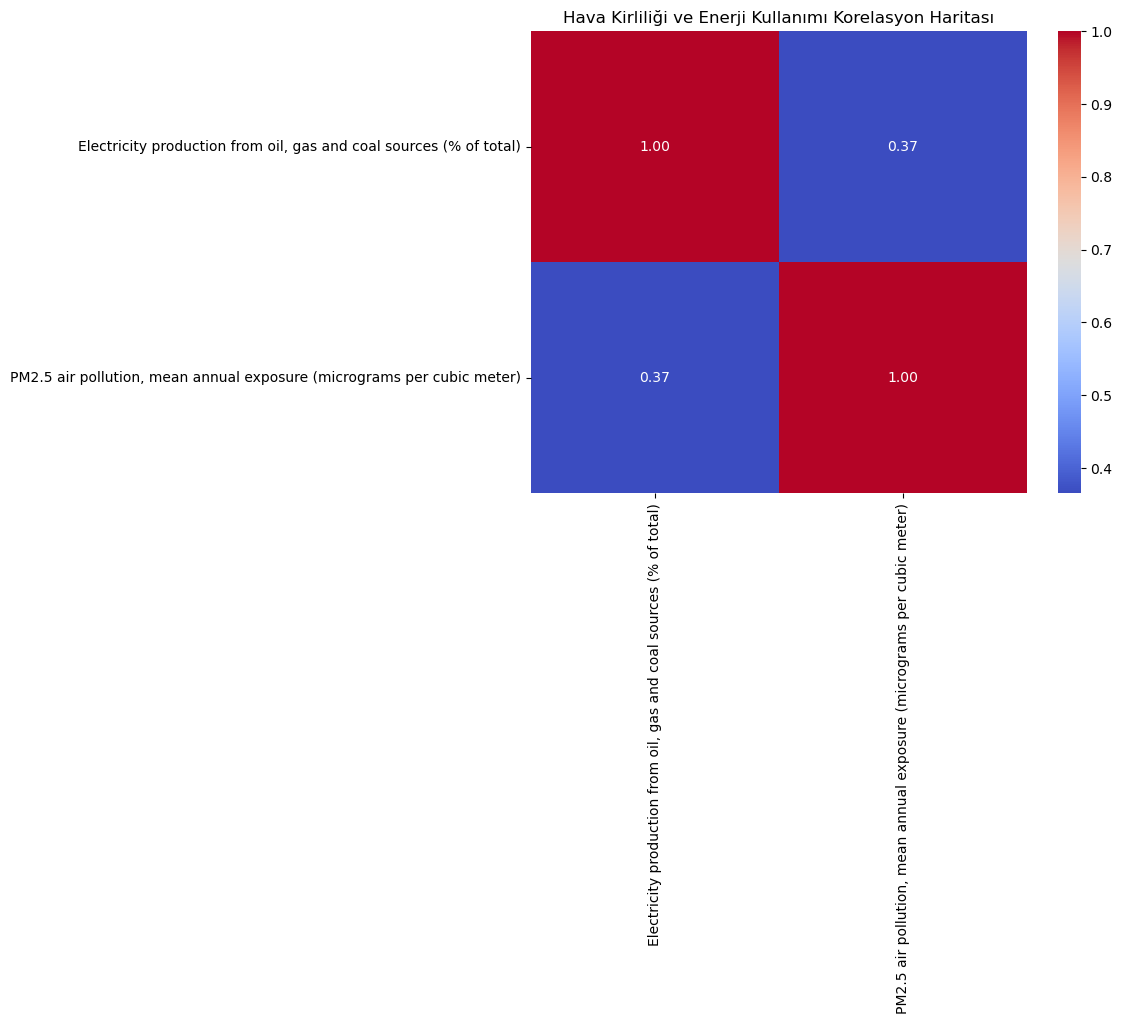

In [129]:
# Sayısal olmayan değerleri temizleme
df["Electricity production from oil, gas and coal sources (% of total)"] = pd.to_numeric(
    df["Electricity production from oil, gas and coal sources (% of total)"], errors="coerce"
)

df["PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"] = pd.to_numeric(
    df["PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"], errors="coerce"
)

# **Fosil Yakıt Tüketimi ve Hava Kirliliği İlişkisi - Scatter Plot**
fig_pollution_scatter = px.scatter(
    df.dropna(subset=["Electricity production from oil, gas and coal sources (% of total)", 
                      "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"]),
    x="Electricity production from oil, gas and coal sources (% of total)",
    y="PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",
    title="Fosil Yakıt Tüketimi ve Hava Kirliliği İlişkisi",
    labels={
        "Electricity production from oil, gas and coal sources (% of total)": "Fosil Yakıt Kaynaklı Elektrik Üretimi (%)",
        "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)": "PM2.5 Hava Kirliliği (µg/m³)"
    },
    hover_name="Country Name",
    color="Continent"
)

fig_pollution_scatter.show()

# **Hava Kirliliği ve Enerji Kullanımı - Heatmap**
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[["Electricity production from oil, gas and coal sources (% of total)", 
                   "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Hava Kirliliği ve Enerji Kullanımı Korelasyon Haritası")
plt.show()


R² Skoru: 0.0012


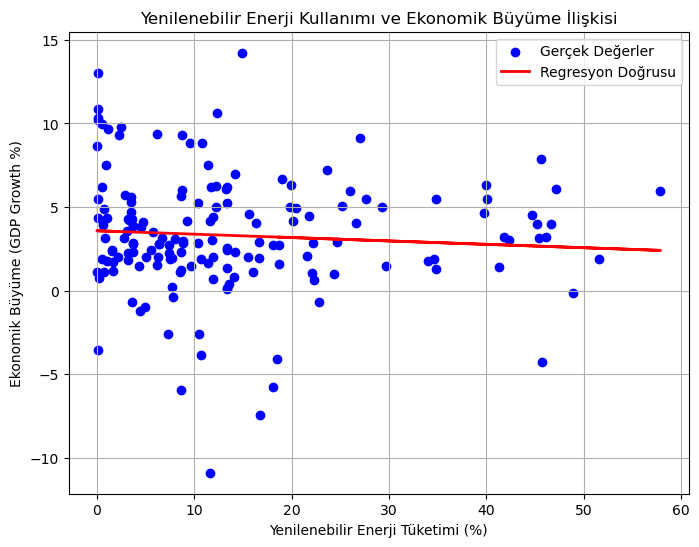

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Veri setinden ilgili sütunları seçelim
df_regression = df[['Renewable energy consumption (% of total final energy consumption)', 'GDP growth (annual %)']].dropna()

# Değişkenleri belirleyelim
X = df_regression[['Renewable energy consumption (% of total final energy consumption)']]
y = df_regression['GDP growth (annual %)']

# Veri setini eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturalım
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapalım
y_pred = model.predict(X_test)

# Modelin başarısını değerlendirelim
r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2:.4f}")

# Regresyon doğrusunu çizelim
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label="Gerçek Değerler")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regresyon Doğrusu")
plt.xlabel("Yenilenebilir Enerji Tüketimi (%)")
plt.ylabel("Ekonomik Büyüme (GDP Growth %)")
plt.title("Yenilenebilir Enerji Kullanımı ve Ekonomik Büyüme İlişkisi")
plt.legend()
plt.grid(True)
plt.show()


In [153]:
# Gerekli kütüphaneler
import numpy as np

# Temizlenecek sayısal sütunları belirle
numeric_cols = [
    'Renewable energy consumption (% of total final energy consumption)',
    'GDP growth (annual %)',
    'Energy use (kg of oil equivalent per capita)',
    'Electricity production from nuclear sources (% of total)',
    'Electricity production from oil, gas and coal sources (% of total)',
    'Access to electricity (% of population)',
    'GDP per capita (constant 2015 US$)',
    'Population density (people per sq. km of land area)',
    'Population growth (annual %)',
    'Urban population (% of total population)',
    'Forest area (% of land area)',
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'
]

# Metin içeren hatalı verileri temizle ve sayıya çevir
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eksik değerleri median (ortanca) ile doldur
df.fillna(df.median(), inplace=True)

# Temizlenen veri setini kontrol et
print(df[numeric_cols].info())


TypeError: Cannot convert [['China' 'China' 'China' ... 'France' 'France' 'France']
 ['CHN' 'CHN' 'CHN' ... 'FRA' 'FRA' 'FRA']
 ['YR2000' 'YR2001' 'YR2002' ... 'YR2021' 'YR2022' 'YR2023']] to numeric